# 의사결정나무_분류

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# train, test를 분할하기 위한 함수
from sklearn.model_selection import train_test_split, GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix

# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family = "nanumGothic")

# sklearn.tree 의 DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier

# sklearn.tree의 export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz

# graphviz import: 의사결정 나무 모델 시각화  .dot 확장자 파일 불러오는 패키지
import graphviz

유방암 결과를 분류하는 의사결정나무 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.  
데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)  
- 목표변수(diagnosis : 양성(108개), 음성(benign, 212개)   


**데이터 불러오기**

In [2]:
df_raw = pd.read_csv("./Data/유방암.csv" , engine = "python", encoding = 'cp949')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


**결측치 확인**

In [3]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

목표변수 외에는 모두 연속형이므로 더미변수를 생성할 필요없음

In [5]:
df_raw_y = df_raw["diagnosis"] 
df_raw_x = df_raw.drop('diagnosis', axis = 1)
df_raw_y = np.where(df_raw_y == "음성", 0, 1)

**train, test 데이터 분할**

In [6]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## 의사결정나무 모델 생성

**기본 모형 train, test score 확인**

In [7]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.883


train data에 과적합된 모습을 볼 수 있다.

**max_depth 파라미터 설정**

In [8]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883
5,6,1.000,0.883
6,7,1.000,0.883
7,8,1.000,0.883
8,9,1.000,0.883
9,10,1.000,0.883


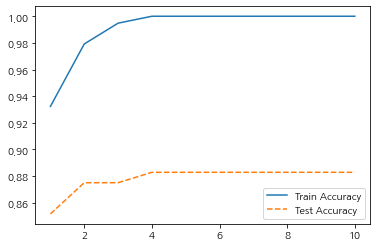

In [9]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

max_depth가 4이후부터 saturation되는 것을 볼 수 있다. max_depth는 4로 설정한다.

**min_samples_leaf 파라미터 설정**

In [10]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)


,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.995,0.875
1,4,0.974,0.891
2,6,0.964,0.875
3,8,0.958,0.898
4,10,0.953,0.914
5,12,0.943,0.906
6,14,0.932,0.898
7,16,0.932,0.852
8,18,0.932,0.852
9,20,0.932,0.852


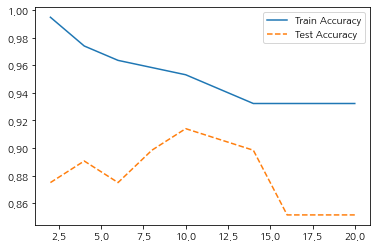

In [11]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

min_samples_leaf가 10일 때 train과 test score의 갭이 가장 작은 것을 볼 수 있다. min_samples_leaf = 10

**min_samples_split 파라미터 설정**

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 20 for n_split in range(1, 11)]

for min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf = 10, max_depth = 4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.953,0.914
1,40,0.953,0.914
2,60,0.953,0.914
3,80,0.953,0.914
4,100,0.932,0.852
5,120,0.932,0.852
6,140,0.932,0.852
7,160,0.932,0.852
8,180,0.932,0.852
9,200,0.599,0.758


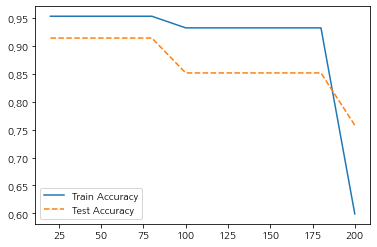

In [13]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

min_samples_split의 경우 200부터 줄어드는 것을 볼 수 있다. 따라서 이 파라미터의 경우 따로 값을 지정해주지 않는다.

### 최종 모델 선정

In [14]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 10)
tree_final.fit(df_train_x, df_train_y)

# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.914

Confusion matrix: 
[[94  3]
 [ 8 23]]


>정분류율은 91.4%로 일반적인 데이터 분류의 경우 분류율이 좋다고 할 수 있지만, 유방암 데이터는 의료데이터이기 때문에 해당 분류율에 대한 검정이 좋은 편인지는 도메인 분석가와의 상의가 필요할 것이라고 생각된다.  
특히 실제데이터는 양성인데 음성이라고 예측한 결과가 8개나 발생된 것을 볼 수 있다. 실제로 현실에서 환자를 진료하는 상황이라면 문제가 발생할 가능성이 있다고 할 수 있다.

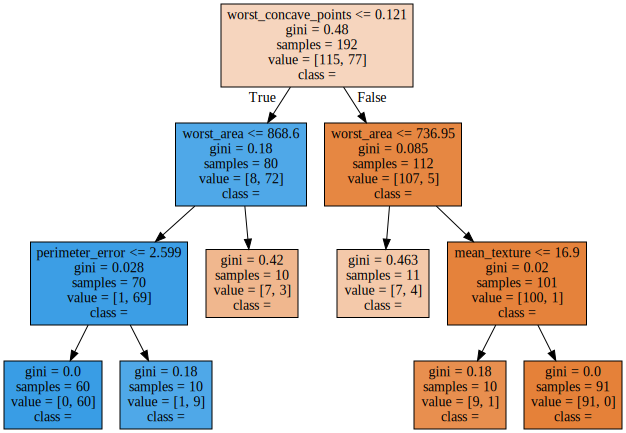

In [15]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["음성", "양성"],
                feature_names = df_raw_x.columns, impurity = True, filled = True)

# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

worst_concave_points변수가 가장 중요도가 높아 첫번째 분기점이 된다.
worst_concave_points <= 0.121이면서 worst_area <= 868.6이고 wperimeter_error <= 2.599인 노드에 해당하는 모든 sample들은 양성으로 분류한다.

In [16]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = df_raw_x.columns
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,worst_concave_points,0.861
23,worst_area,0.135
1,mean_texture,0.002
12,perimeter_error,0.002
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000
24,worst_smoothness,0.000


Text(0, 0.5, '설명변수')

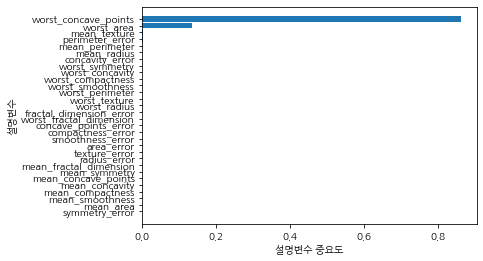

In [17]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")


예상했던 것처럼 worst_concave_points가 가장 중요한 설명변수이다.	

**GridSearchCV를 이용해서 최적의 parameter를 찾고 그 모델에 대해 test score와 confusion matrix를 다시 살펴본다.**

In [18]:
estimator = DecisionTreeClassifier(random_state = 1234)
param_grid = {"max_depth": para_depth,
              "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=20,
                       random_state=1234)

best parameter: 
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 20}

best score: 
0.937


In [19]:
tree_final2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2, min_samples_split = 20 )
tree_final2.fit(df_train_x, df_train_y)

# 평가
y_pred2 = tree_final2.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final2.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred2)))

Accuracy: 0.875

Confusion matrix: 
[[87 10]
 [ 6 25]]


> **결론**  
앞서 직접 계산한 파라미터로 모델을 생성했을 때보다 오히려 정분류율이 감소했다. 다만 실제로는 양성인데 음성으로 예측한 갯수가 이전보다 줄어들었고 이는 양성을 잘 판단해야하는 의료용 분류기로서는 오히려 더 좋은 성능을 갖췄다고 볼 수 있다.   
앞서 말했듯이 파라미터를 달리한 두 모델 모두 정분류율이 91.4%, 87.5%로 일반적인 데이터 분류의 경우 분류율이 좋다고 할 수 있지만, 유방암 데이터는 의료데이터이기 때문에 해당 분류율에 대한 검정이 좋은 편인지는 도메인 분석가와의 상의가 필요할 것이라고 생각된다.
실제로 현실에서 환자를 진료하는 상황을 고려해서 적절한 모델 선정이 필요할 것으로 판단된다.